In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
    --------------------------------------- 8.1/376.0 MB 41.8 MB/s eta 0:00:09
   -- ------------------------------------- 26.7/376.0 MB 67.7 MB/s eta 0:00:06
   ---- ----------------------------------- 46.7/376.0 MB 76.1 MB/s eta 0:00:05
   ------ --------------------------------- 64.7/376.0 MB 79.3 MB/s eta 0:00:04
   -------- ------------------------------- 84.1/376.0 MB 82.6 MB/s eta 0:00:04
   ---------- ---------------------------- 103.0/376.0 MB 84.3 MB/s eta 0:00:04
   ------------ -------------------------- 120.8/376.0 MB 84.8 MB/s eta 0:00:04
   -------------- ------------------------ 138.1/376.0 MB 84.9 MB/s eta 0:00:03
   ---------------- ---------------------- 156.0/376.0 MB 85.2 MB/s eta 0:00:03
   ------------------ -------------------- 174.3/376.0 MB 85.7 MB/s eta 0:00:03
   ------------------- ------------------- 191.6/376

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Perceptron model

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [7]:
df = pd.read_csv('TensorFlow_FILES/DATA/fake_reg.csv')

In [9]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


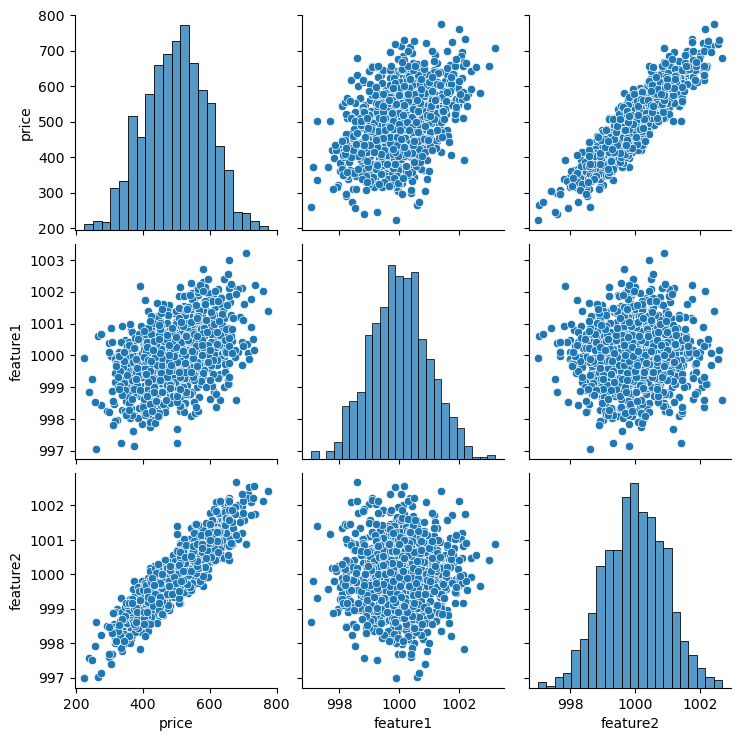

In [15]:
sns.pairplot(df)

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
#need numpy arrays not pandas series so do .values
X = df[['feature1','feature2']].values
y= df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
X_train.shape

(700, 2)

In [23]:
X_test.shape

(300, 2)

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [29]:
scaler.fit(X_train)

MinMaxScaler()

In [31]:
X_train = scaler.transform(X_train)

In [33]:
X_test = scaler.transform(X_test)

In [35]:
X_train.min()

0.0

In [37]:
import tensorflow

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [41]:
help(Dense)

Help on class Dense in module keras.src.layers.core.dense:

class Dense(keras.src.layers.layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, lora_rank=None, **kwargs)
 |
 |  Just your regular densely-connected NN layer.
 |
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |
 |  Note: If the input to the layer has a rank greater than 2, `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
 |  F

In [43]:
model = Sequential([Dense(4,activation = 'relu'),Dense(2,activation='relu'),Dense(1)])

In [53]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [55]:
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 259869.8750   
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 254033.8125 
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 261861.6562 
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 258291.7656 
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 255953.5000 
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 250127.6562 
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 254245.3125 
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 248602.1406 
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 251842.7344 
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 251304.7969 
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 255214.1406 
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 256972.3594 
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 250530.8906 
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss

In [61]:
loss = pd.DataFrame(model.history.history)

In [63]:
loss.head()

,loss
0,256513.375000
1,256307.125000
2,256091.156250
3,255850.625000
4,255591.640625


<Axes: >

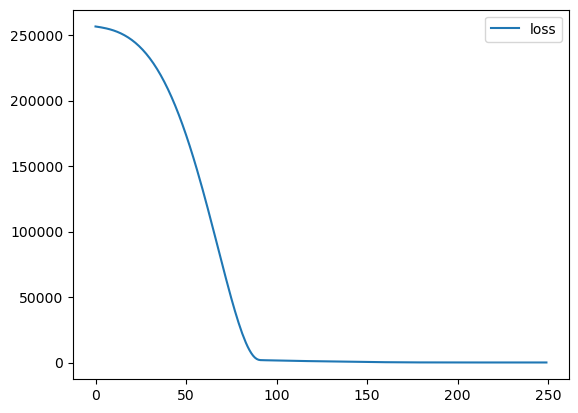

In [67]:
loss.plot()

In [69]:
model.evaluate(X_test,y_test,verbose=0)

25.847972869873047

In [71]:
model.evaluate(X_train,y_train,verbose=0)

25.63883399963379

In [73]:
test_predictions = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [85]:
len(test_predictions)

300

In [77]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [79]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [81]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [83]:
pred_df

,Test True Y,0
0,402.296319,404.391632
1,624.156198,622.294739
2,582.455066,590.920105
3,578.588606,571.101013
4,371.224104,365.852692
...,...,...
295,525.704657,527.982727
296,502.909473,514.377258
297,612.727910,608.420593
298,417.569725,416.004181


In [87]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [89]:
pred_df

,Test True Y,Model Predictions
0,402.296319,404.391632
1,624.156198,622.294739
2,582.455066,590.920105
3,578.588606,571.101013
4,371.224104,365.852692
...,...,...
295,525.704657,527.982727
296,502.909473,514.377258
297,612.727910,608.420593
298,417.569725,416.004181


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

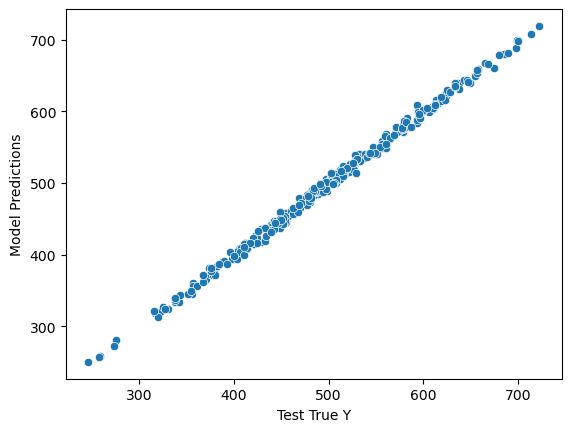

In [91]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [97]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

4.0746131141154365

In [99]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [101]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

25.847975996933243

In [103]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5

5.0840904788303325

In [105]:
new_gem = [[998,1000]]

In [111]:
new_gem = scaler.transform(new_gem)

In [113]:
model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[418.8333]], dtype=float32)

In [115]:
from tensorflow.keras.models import load_model

In [117]:
model.save('my_gem_model.h5')

In [119]:
model.save('my_gem_model.keras')

In [121]:
later_model = load_model('my_gem_model.keras')

In [123]:
later_model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[418.8333]], dtype=float32)

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('TensorFlow_FILES/DATA/kc_house_data.csv')

In [8]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


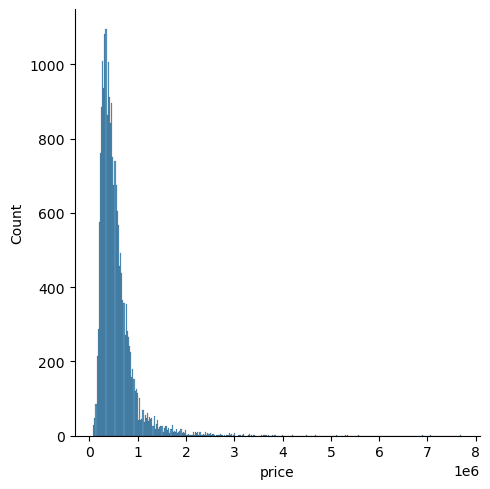

In [14]:
sns.displot(df['price'])

<Axes: xlabel='bedrooms', ylabel='count'>

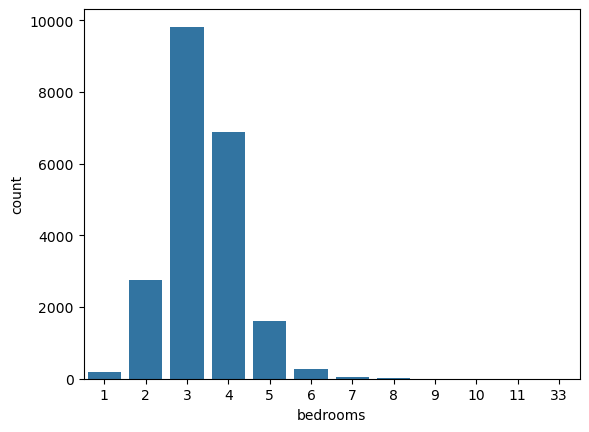

In [17]:
sns.countplot(data=df,x='bedrooms')

In [25]:
df.corr(numeric_only=True)['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='sqft_living'>

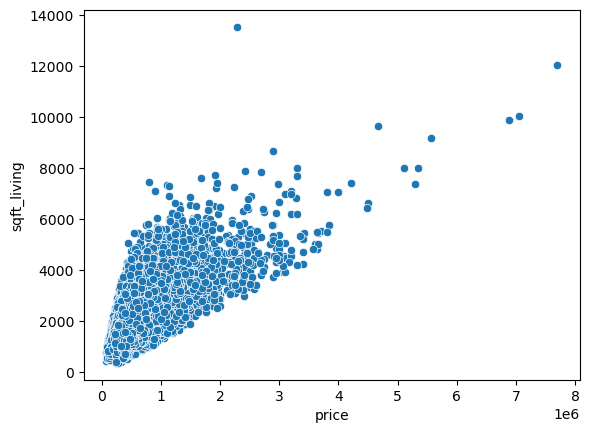

In [27]:
sns.scatterplot(x='price',y='sqft_living',data=df)

<Axes: xlabel='bedrooms', ylabel='price'>

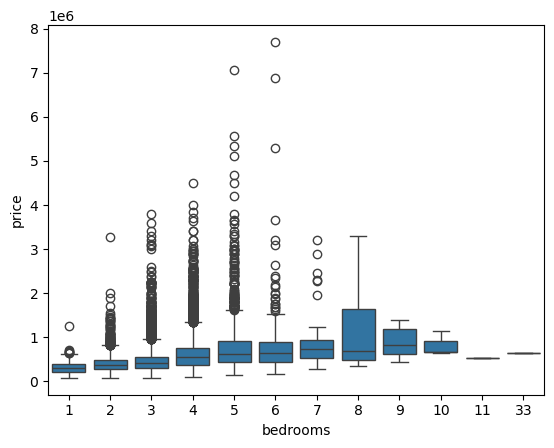

In [29]:
sns.boxplot(x='bedrooms',y='price',data=df)

In [33]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<Axes: xlabel='price', ylabel='lat'>

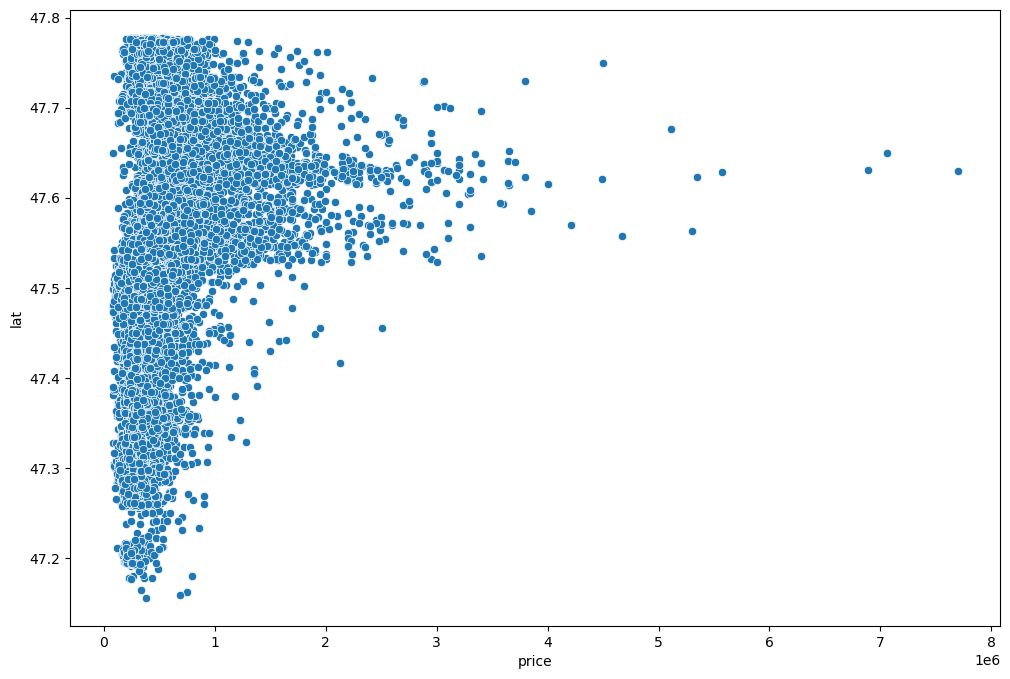

In [37]:
plt.figure(figsize=(12 ,8))
sns.scatterplot(x='price',y='lat',data=df)

<Axes: xlabel='long', ylabel='lat'>

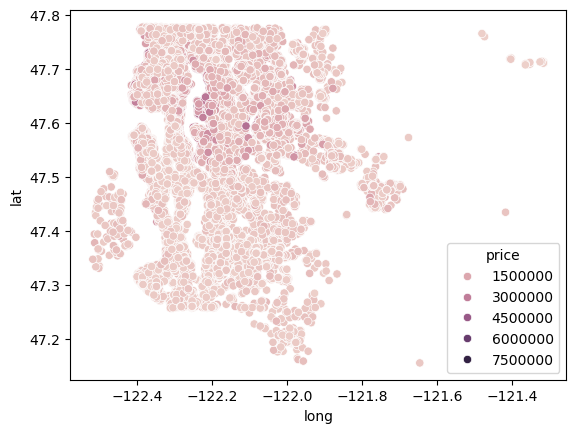

In [41]:
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [45]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [49]:
len(df)*0.01

215.97

In [51]:
#want to see 1 percent of houses or 99 bottom
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

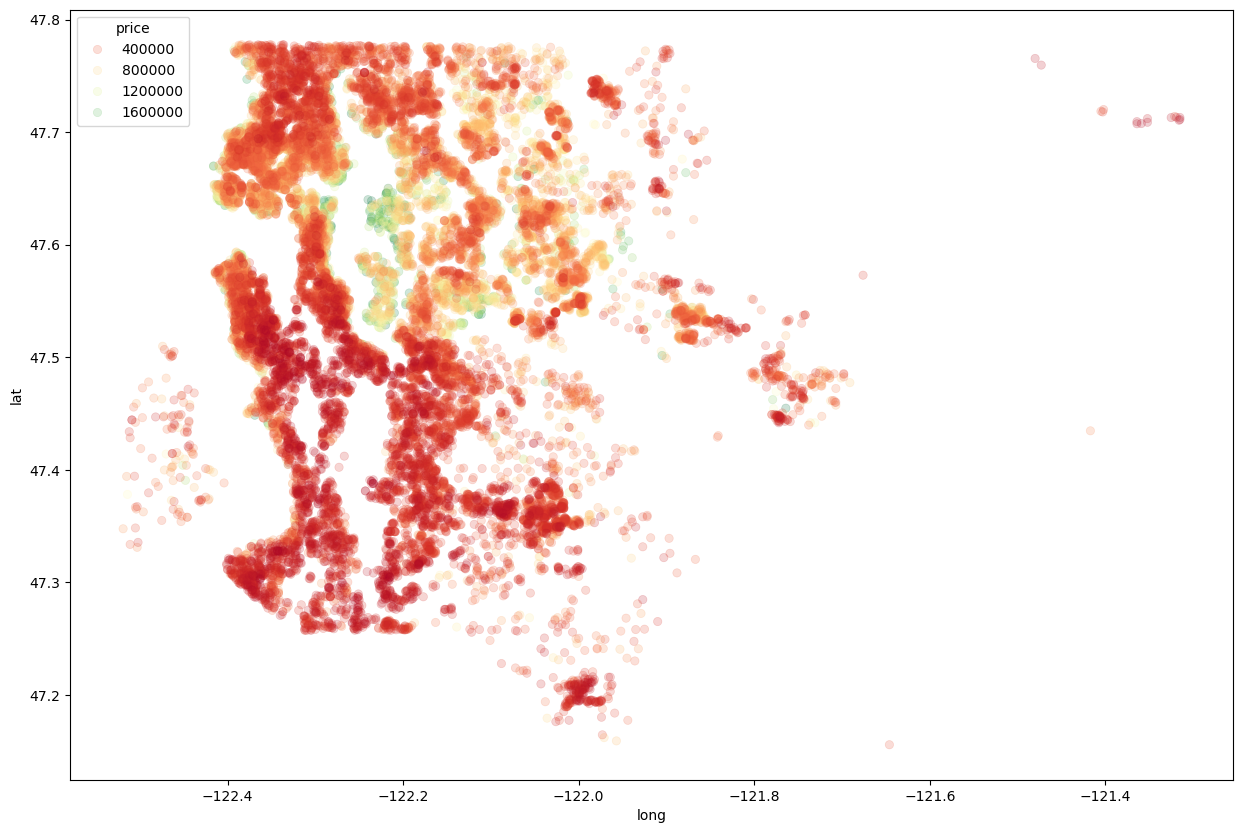

In [57]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,hue='price',edgecolor=None,alpha=0.2, palette='RdYlGn')

<Axes: xlabel='waterfront', ylabel='price'>

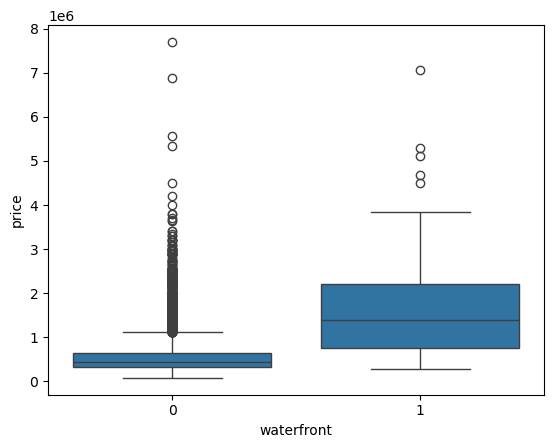

In [59]:
sns.boxplot(x='waterfront',y='price',data=df)

In [61]:
df = df.drop('id',axis=1)

In [63]:
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [65]:
df['date'] = pd.to_datetime(df['date'])

In [67]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [73]:
df['year'] = df['date'].apply(lambda date: date.year)

In [75]:
df['year']

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21592    2014
21593    2015
21594    2014
21595    2015
21596    2014
Name: year, Length: 21597, dtype: int64

In [77]:
df['month'] = df['date'].apply(lambda date: date.month)

In [79]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<Axes: xlabel='month', ylabel='price'>

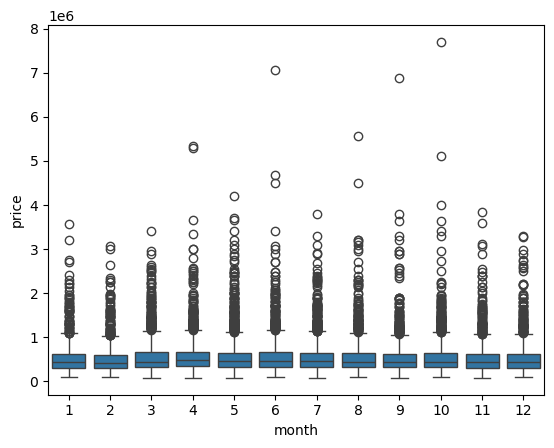

In [81]:
sns.boxplot(x= 'month',y='price',data=df)

<Axes: xlabel='month'>

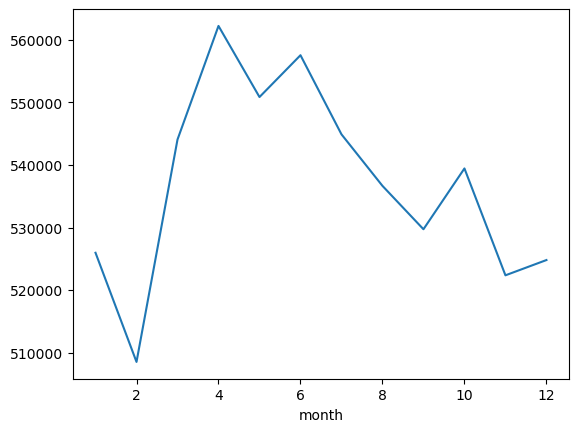

In [85]:
df.groupby('month').mean()['price'].plot()

In [87]:
df = df.drop('date',axis=1)

In [89]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [91]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [93]:
#want to treat zipcodes as categorical variable and not numerical, we will drop it since it is too many dummy variables.

df['zipcode'].value_counts()

zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: count, Length: 70, dtype: int64

In [95]:
df = df.drop('zipcode',axis=1)

In [99]:
df['yr_renovated'].value_counts()

yr_renovated
0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [101]:
df['sqft_basement'].value_counts()

sqft_basement
0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: count, Length: 306, dtype: int64

Part 2 Keras Regression

In [104]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [106]:
from sklearn.model_selection import train_test_split

In [ ]:
train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [110]:
from sklearn.preprocessing import MinMaxScaler

In [112]:
scaler = MinMaxScaler()

In [114]:
X_train = scaler.fit_transform(X_train)

In [116]:
X_test = scaler.transform(X_test)

In [118]:
import tensorflow

In [120]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [124]:
X_train.shape

(15117, 19)

In [126]:
model= Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [128]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 419446947840.0000 - val_loss: 418943172608.0000
Epoch 2/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 431256371200.0000 - val_loss: 416273629184.0000
Epoch 3/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 422081134592.0000 - val_loss: 389532614656.0000
Epoch 4/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 367724134400.0000 - val_loss: 288794017792.0000
Epoch 5/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 265179660288.0000 - val_loss: 140929187840.0000
Epoch 6/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 126358519808.0000 - val_loss: 95898247168.0000
Epoch 7/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 97248911360.0000 - val_loss: 94042095616.0000
Epoch 8/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 92557385728.0000 - val_loss: 92642713600.0000
Epoch 9/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 97721573376.0000 - val_loss: 91101896704.0000
Epoch 10/400
119/119 ━━━━━

Part 3 

In [137]:
losses = pd.DataFrame(model.history.history)

<Axes: >

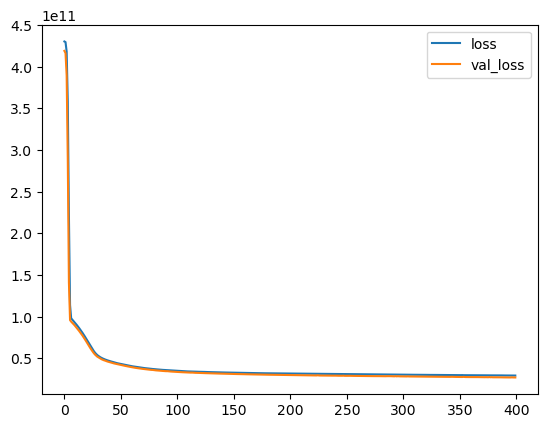

In [141]:
losses.plot()

In [143]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [145]:
predictions = model.predict(X_test)

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step


In [147]:
predictions

array([[414411.75],
       [587858.2 ],
       [585517.06],
       ...,
       [401778.97],
       [582806.7 ],
       [691375.25]], dtype=float32)

In [149]:
mean_squared_error(y_test,predictions)

27056506074.22089

In [151]:
np.sqrt(mean_squared_error(y_test,predictions))

164488.61989274787

In [153]:
mean_absolute_error(y_test,predictions)

101841.20944613233

In [155]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [157]:
 5.402966e+05


540296.6

In [163]:
explained_variance_score(y_test,predictions)

0.7960811033055009

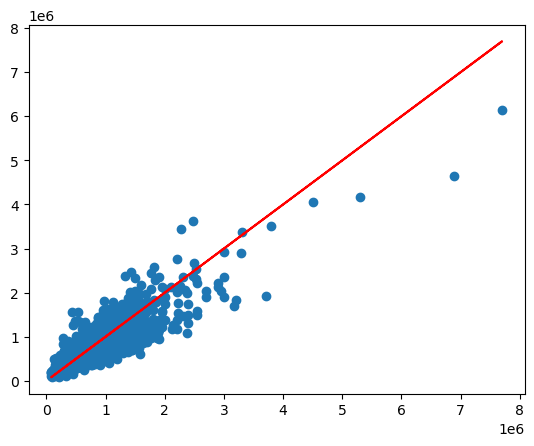

In [167]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [169]:
df.drop('price',axis=1).iloc[0]

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [185]:
single_house = df.drop('price',axis=1).iloc[0]

In [187]:
single_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [189]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [191]:
model.predict(single_house)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[284857.94]], dtype=float32)

In [195]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


In [ ]:
#retrain by dropping outliers in high price ranges
#Can have early dropout to have model stop based off loss coindition



NExt Part

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('TensorFlow_FILES/DATA/cancer_classification.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

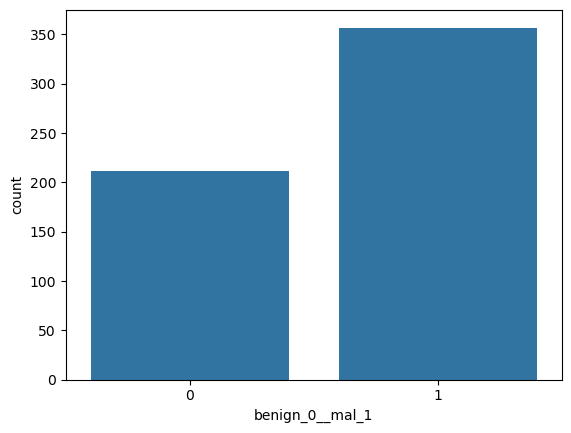

In [14]:
sns.countplot(x='benign_0__mal_1',data=df)

<Axes: >

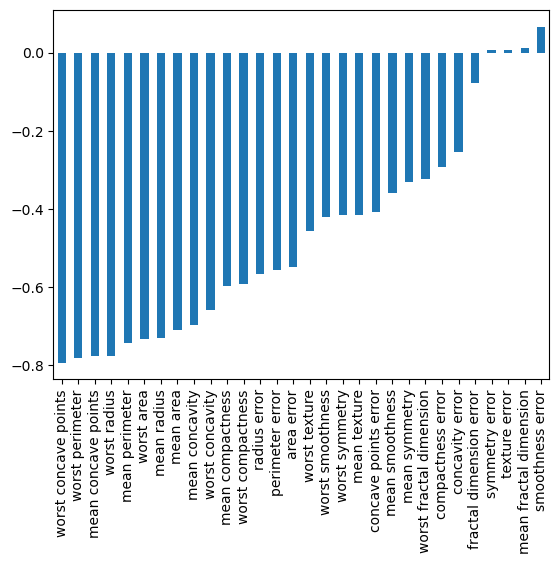

In [26]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<Axes: >

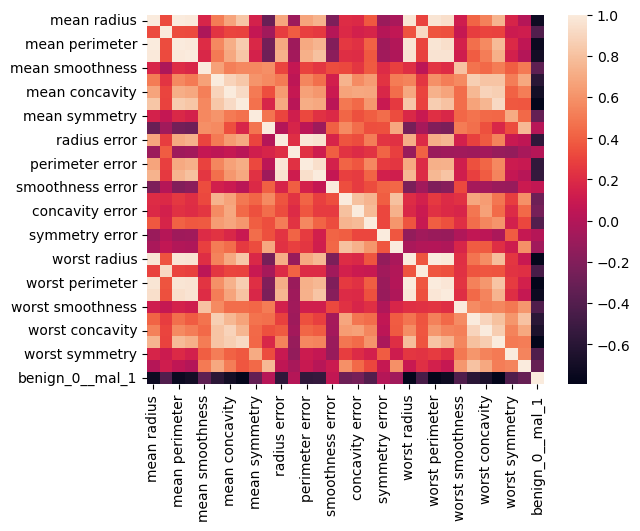

In [28]:
sns.heatmap(df.corr())

In [30]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [32]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [42]:
X_train = scaler.fit_transform(X_train)

In [64]:
X_test = scaler.transform(X_test)

In [46]:
from tensorflow.keras.models import Sequential

In [48]:
from tensorflow.keras.layers import Dense, Dropout

In [66]:
X_train.shape

(426, 30)

In [68]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

#Binary Classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [70]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.6956 - val_loss: 0.6822
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6731 - val_loss: 0.6583
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6447 - val_loss: 0.6267
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6127 - val_loss: 0.5857
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5657 - val_loss: 0.5415
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5191 - val_loss: 0.4905
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4648 - val_loss: 0.4378
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4285 - val_loss: 0.3872
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3804 - val_loss: 0.3389
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3175 - val_loss: 0.2984
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2695 - val_loss: 0.2665
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

In [72]:
losses = pd.DataFrame(model.history.history)

<Axes: >

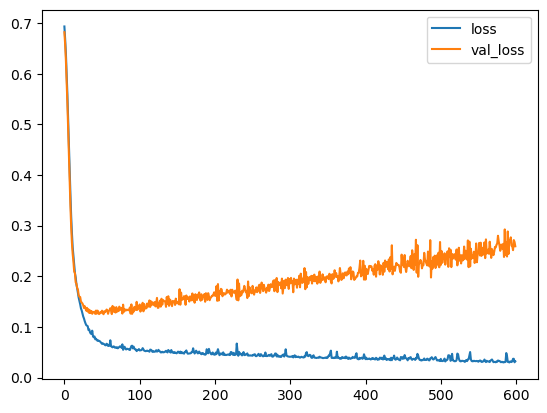

In [74]:
losses.plot()

In [76]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

#Binary Classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [78]:
from tensorflow.keras.callbacks import EarlyStopping

In [80]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.src.callbacks.early_stopping:

class EarlyStopping(keras.src.callbacks.callback.Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |
 |  Stop training when a monitored metric has stopped improving.
 |
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |
 |  Args:
 |      monitor: Quantity to be monitored. Defaults to `"val

In [82]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [84]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.6539 - val_loss: 0.6219
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6110 - val_loss: 0.5969
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5835 - val_loss: 0.5640
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5606 - val_loss: 0.5289
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5240 - val_loss: 0.4941
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4785 - val_loss: 0.4577
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4488 - val_loss: 0.4255
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4323 - val_loss: 0.3899
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3929 - val_loss: 0.3601
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3564 - val_loss: 0.3271
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3160 - val_loss: 0.2999
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

<Axes: >

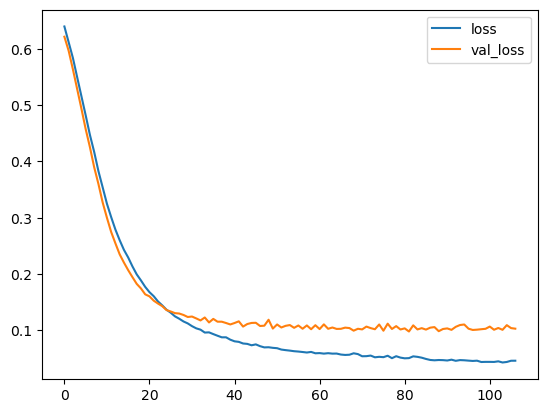

In [86]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [88]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

#Binary Classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [90]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.7253 - val_loss: 0.7001
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6841 - val_loss: 0.6897
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6850 - val_loss: 0.6766
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6807 - val_loss: 0.6640
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6608 - val_loss: 0.6449
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6460 - val_loss: 0.6211
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6228 - val_loss: 0.5988
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6186 - val_loss: 0.5742
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6045 - val_loss: 0.5446
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5513 - val_loss: 0.5090
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5604 - val_loss: 0.4791
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

<Axes: >

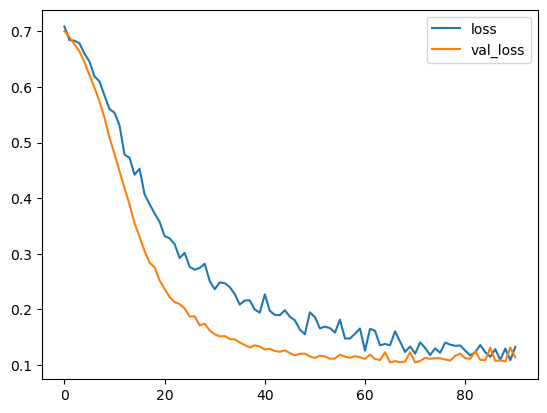

In [92]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [98]:
predictions = (model.predict(X_test) >0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [100]:
predictions

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [102]:
from sklearn.metrics import classification_report, confusion_matrix

In [106]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [108]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 4 84]]
